3. “assignment_8_3.ipynb” to repeat the second bullet point using one year
ago data and compare the output with the latest results using a 3x2
subplot containing all the network representations. 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Repeat with last year's data

### Load the data


In [2]:
import pandas as pd

trade_last_year = pd.read_excel("export_2020m1.xlsx", skiprows=1, index_col=0, nrows=7)
trade_last_year

,Canada,France,Germany,Italy,Japan,United Kingdom,United States
Canada,NaN,259.774344,356.288051,158.939284,773.170192,1458.702675,26820.721998
France,269.969993,NaN,6440.928402,3525.584930,544.497147,2685.976457,3219.695959
Germany,931.950594,9628.673888,NaN,6253.252577,1863.955690,6717.742877,10086.173941
Italy,385.370044,4422.526669,5280.943382,NaN,718.988403,2248.973697,4146.895775
Japan,742.191653,482.307729,1487.667310,373.958913,NaN,1331.326120,9664.659178
United Kingdom,547.707600,2434.150113,4016.820126,984.401990,538.725446,NaN,6139.224086
United States,22550.409387,3494.204301,4718.306603,1742.348778,5454.467853,5832.579169,NaN


## Create the network

We first convert the matrix data into pair data

In [3]:
trade_last_year = pd.melt(trade_last_year.reset_index(), id_vars='index')
trade_last_year.columns = ['export_country', 'import_country', 'value']

In [4]:
trade_last_year.dropna(inplace=True)
trade_last_year.head()

,export_country,import_country,value
1,France,Canada,269.969993
2,Germany,Canada,931.950594
3,Italy,Canada,385.370044
4,Japan,Canada,742.191653
5,United Kingdom,Canada,547.707600


Now we can use the pairs to create the graph, with the first two columns representing the nodes and the last column representing the weight

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G_last_year = nx.Graph()

for index, row in trade_last_year.iterrows():
    G_last_year.add_edge(row['export_country'], row['import_country'], weight=row['value'])

# remove isolated vertices (if any)    
remove = [node for node,degree in G_last_year.degree() if degree ==0]
G_last_year.remove_nodes_from(remove)

#Setting size and colours
options = {
     'node_color': 'lightblue',
     'edge_color': 'lightblue',
     'node_size': 1,
     'width': 1,
     'alpha': 1.0}

## Draw the graphs to compare

First load back the data:

In [9]:
import pickle

f = open("graph.pickle", "rb") #rb: open the file to read
G_latest = pickle.load(f)
f.close()

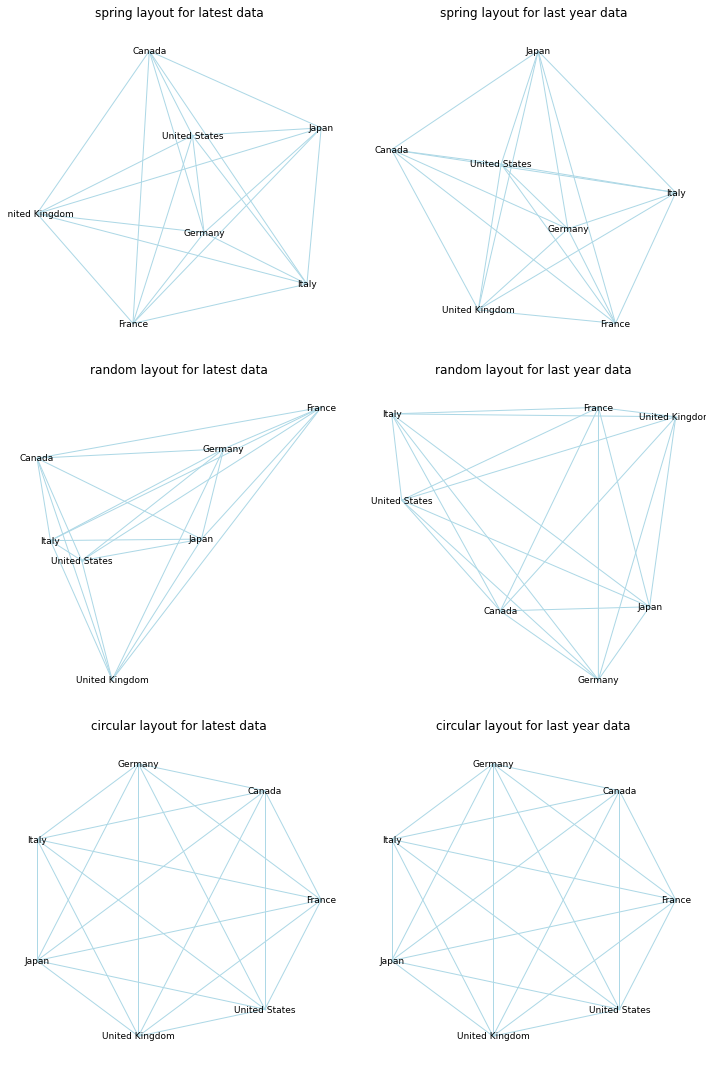

In [14]:
fig, ax = plt.subplots(3, 2, figsize = (10, 15))   # 3 by 2 subplot
layouts = {"spring": nx.spring_layout, "random": nx.random_layout, "circular": nx.circular_layout} #layout in dictionary form
graphs = {"latest": G_latest, "last year": G_last_year}

# nested for loop used here
for i, (layout_name, layout) in enumerate(layouts.items()):   # dictionary.items() -> gives (key,value) pair of object
    for j, (graph_name, graph) in enumerate(graphs.items()):
        pos = layout(G_latest)
        nx.draw_networkx(G_latest, pos=pos, ax=ax[i][j], font_size=9,**options)
        plt.tight_layout()
        ax[i][j].set_axis_off()
        ax[i][j].set_title(f"{layout_name} layout for {graph_name} data")